# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#creating a sample list for testing, to avoid running into openweather's api free query limit.
cities_test = cities[0:10]
print(f"Number of cities in the list: {len(cities_test)}")

Number of cities in the list: 596
Number of cities in the list: 10


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities_test):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city, using endpoint 'q=' to pass in city name. API documentation at source (1)
    #city_url = f"{base_url}?q={city}&appid={weather_api_key}"

    #setting API call parameters in dictionary, to later pass into requests.get() (2)
    params={"q":city, "appid":weather_api_key, "units":'metric'}

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(base_url,params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] #leaving data in unix timestamp format

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"{city} not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa rita
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | taiohae
taiohae not found. Skipping...
Processing Record 4 of Set 1 | richmond
Processing Record 5 of Set 1 | shalqar
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | eyl
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | puerto natales
-----------------------------
Data Retrieval Complete      
-----------------------------


In [ ]:
pprint(city_data[0])

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          9
Lat           9
Lng           9
Max Temp      9
Humidity      9
Cloudiness    9
Wind Speed    9
Country       9
Date          9
dtype: int64

In [5]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa rita,-7.1139,-34.9781,26.37,89,75,4.63,BR,1730084063
1,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,45,75,3.00,RU,1730084064
2,richmond,37.5538,-77.4603,8.41,87,0,0.00,US,1730083801
3,shalqar,47.8333,59.6000,2.55,88,99,4.29,KZ,1730084068
4,college,64.8569,-147.8028,-13.01,82,40,2.57,US,1730084069
5,bethel,41.3712,-73.4140,6.30,55,100,1.44,US,1730084070
6,eyl,7.9803,49.8164,25.87,82,90,2.39,SO,1730084071
7,constantia,44.1833,28.6500,6.38,81,37,4.50,RO,1730084072
8,puerto natales,-51.7236,-72.4875,7.05,90,100,8.35,CL,1730084073


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santa rita,-7.1139,-34.9781,26.37,89,75,4.63,BR,1730084063
1,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,45,75,3.00,RU,1730084064
2,richmond,37.5538,-77.4603,8.41,87,0,0.00,US,1730083801
3,shalqar,47.8333,59.6000,2.55,88,99,4.29,KZ,1730084068
4,college,64.8569,-147.8028,-13.01,82,40,2.57,US,1730084069
5,bethel,41.3712,-73.4140,6.30,55,100,1.44,US,1730084070
6,eyl,7.9803,49.8164,25.87,82,90,2.39,SO,1730084071
7,constantia,44.1833,28.6500,6.38,81,37,4.50,RO,1730084072
8,puerto natales,-51.7236,-72.4875,7.05,90,100,8.35,CL,1730084073


## Create the Scatter Plots Requested

### Latitude Vs. Temperature

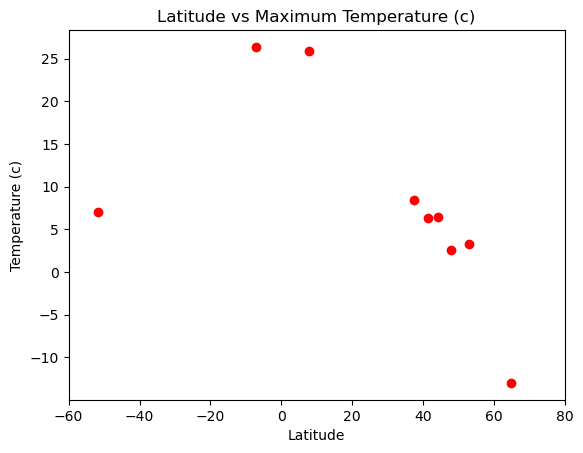

In [12]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]

plt.scatter(x_axis, y_axis, color = 'r')
# Incorporate the other graph properties

plt.title("Latitude vs Maximum Temperature (c)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (c)")
#northernmost and southernmost cities.
plt.xlim(-60,80)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

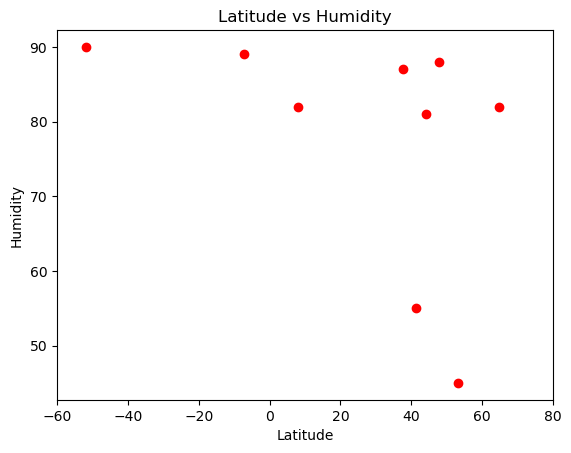

In [13]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis, color = 'r')
# Incorporate the other graph properties

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#northernmost and southernmost cities.
plt.xlim(-60,80)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

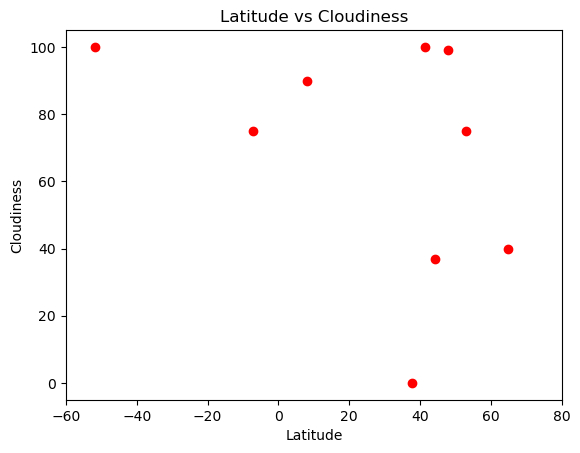

In [14]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis, color = 'r')
# Incorporate the other graph properties

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
#northernmost and southernmost cities.
plt.xlim(-60,80)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

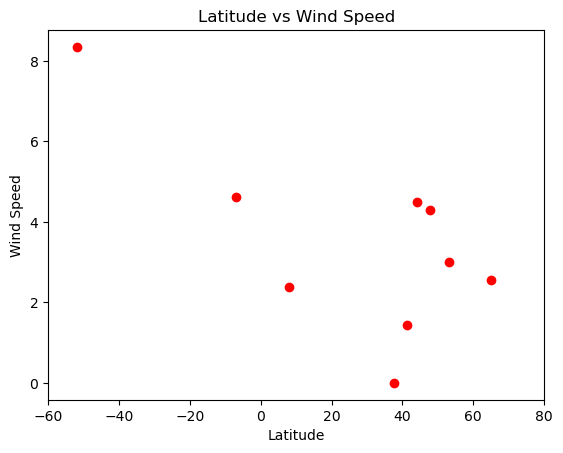

In [15]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis, color = 'r')
# Incorporate the other graph properties

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#northernmost and southernmost cities.
plt.xlim(-60,80)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots

def set_regression(x,y):
    #generating values using scipy.stats.linregress() (3)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    #creating regression formula in string format (3)
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

    return line_eq, slope, intercept, rvalue, pvalue, stderr
    

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0) (4)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0),:]

# Display sample data
northern_hemi_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,45,75,3.00,RU,1730084064
2,richmond,37.5538,-77.4603,8.41,87,0,0.00,US,1730083801
3,shalqar,47.8333,59.6000,2.55,88,99,4.29,KZ,1730084068
4,college,64.8569,-147.8028,-13.01,82,40,2.57,US,1730084069
5,bethel,41.3712,-73.4140,6.30,55,100,1.44,US,1730084070
6,eyl,7.9803,49.8164,25.87,82,90,2.39,SO,1730084071
7,constantia,44.1833,28.6500,6.38,81,37,4.50,RO,1730084072


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0) (4)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<= 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santa rita,-7.1139,-34.9781,26.37,89,75,4.63,BR,1730084063
8,puerto natales,-51.7236,-72.4875,7.05,90,100,8.35,CL,1730084073


##  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.9418962917475706


Text(0, 0.5, 'Max Temp (c)')

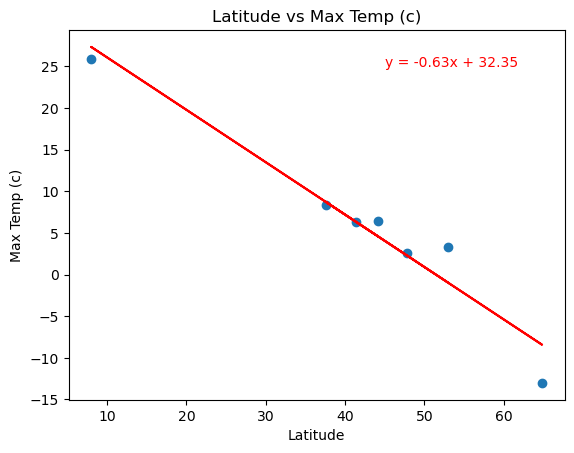

In [44]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(45,25),fontsize=10,color="red")
plt.title("Latitude vs Max Temp (c)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")


Text(0, 0.5, 'Max Temp')

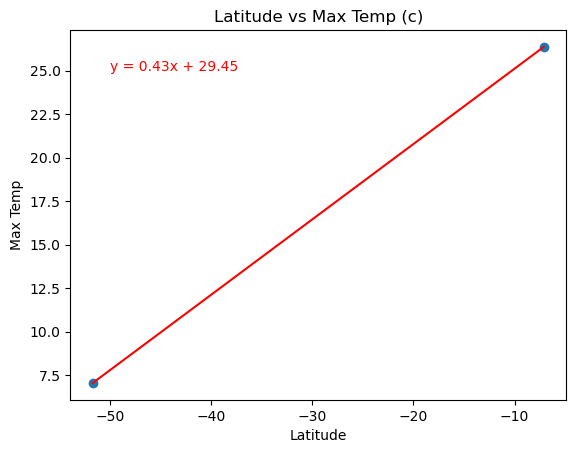

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
#print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(-50,25),fontsize=10,color="red")
plt.title("Latitude vs Max Temp (c)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.03982453373431361


Text(0, 0.5, 'Humidity')

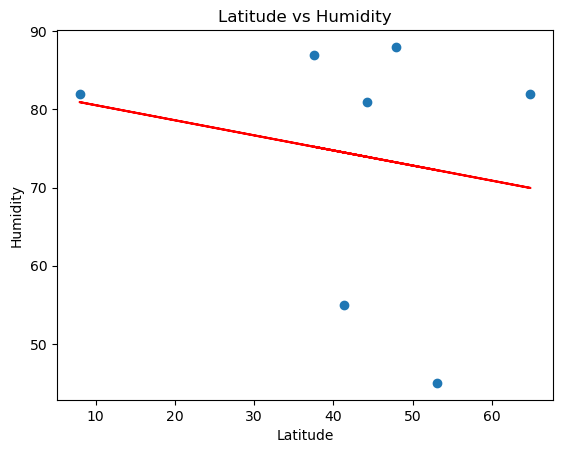

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(45,25),fontsize=10,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r^2 value is: 1.0


Text(0, 0.5, 'Humidity')

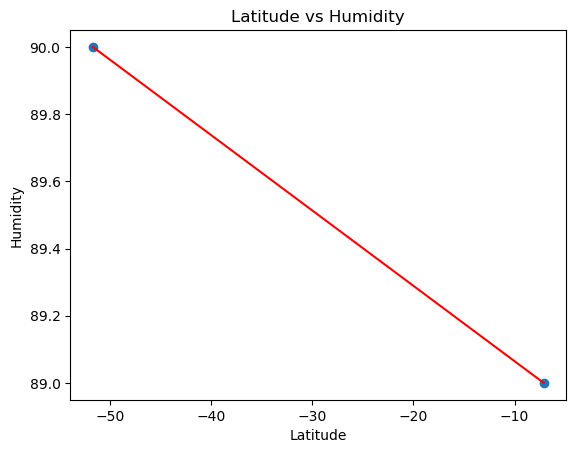

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(45,25),fontsize=10,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.0501777781659899


Text(0, 0.5, 'Cloudiness')

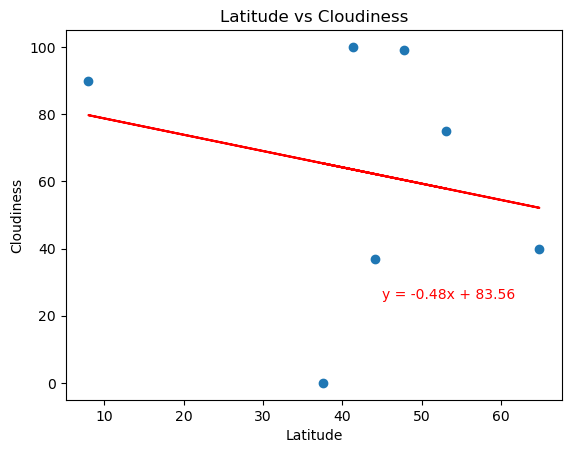

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(45,25),fontsize=10,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r^2 value is: 1.0


Text(0, 0.5, 'Cloudiness')

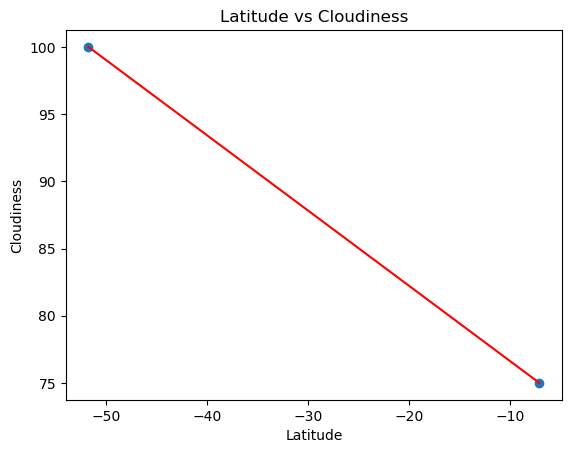

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(45,25),fontsize=10,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

## Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.05029731237166182


Text(0, 0.5, 'Wind Speed')

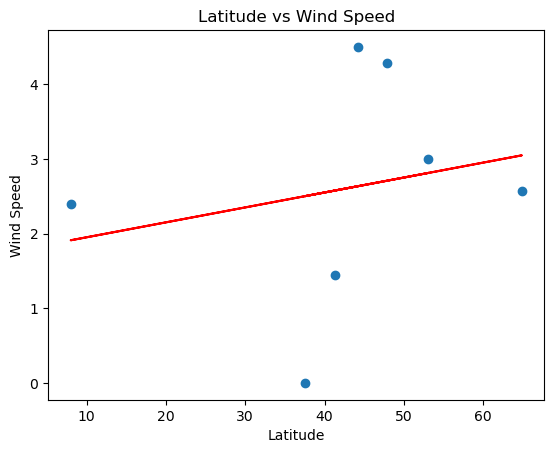

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(45,25),fontsize=10,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r^2 value is: 1.0


Text(0, 0.5, 'Wind Speed')

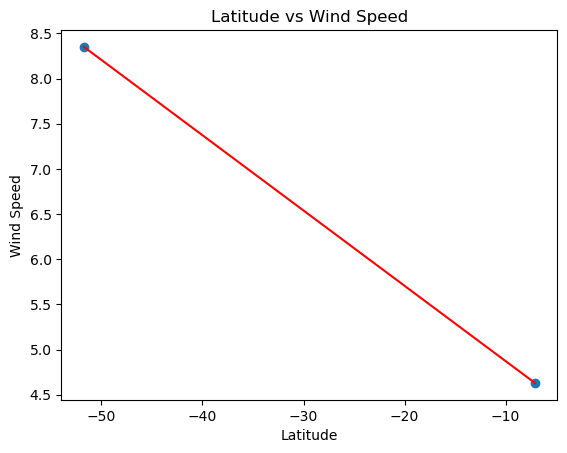

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#using function defined above to generate regression values from series in DataFrame (3)
(line_eq, slope, intercept, rvalue, pvalue, stderr) = set_regression(x_values,y_values)
#setting regression values (3)
regress_values = x_values * slope + intercept

#printing the regression r
print(f"The r^2 value is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#adding regression formula string to plot (3)
plt.annotate(line_eq,(45,25),fontsize=10,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE